In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Loan Predication CSV dataset file using pandas
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.duplicated().sum() # This check any if any duplicated entry exit in dataset 

0

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


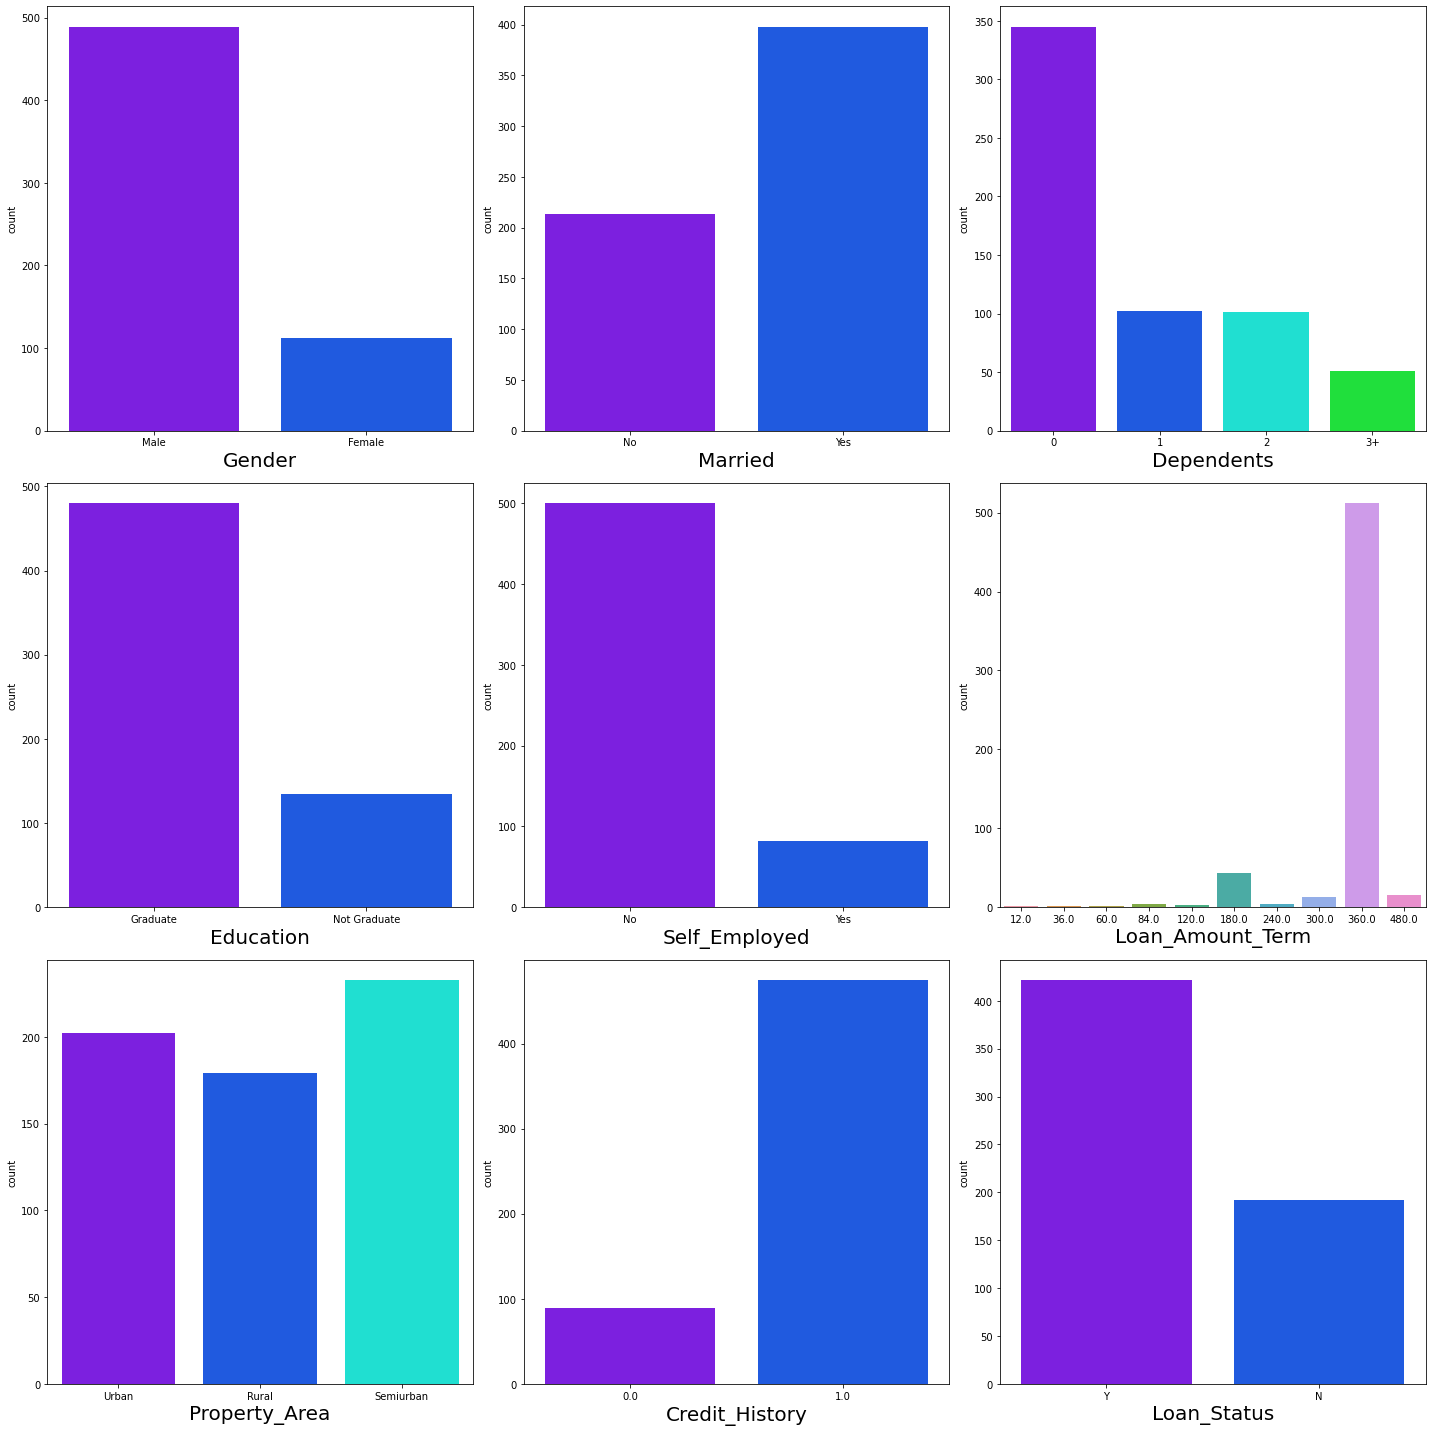

In [14]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Out of Total loan application 80 % applicants are Male.

We can Explore loan amount for each gender applied and evaluate whether on the same basis loan is approved for each gender or not?

Only 20% applicants are self employed. So it will interesting to gain insight on relation between Applicant income and loan approval for non self employed category. We will look to find any benchmark range of Income for loan approval.Another benchmark we will try to find is about loan requirement for these two categories.

Nearly 70% are married and 75% of loan applicants are graduates

Almost 60% of the applicants have no dependents.

Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.

80% people previously have credit history. Normally people having credit history are seen more prone to get loan approval.

Nearly 70 % applicant gets loan approved.

We can impute categoical variable with mode in that category. For numerical variable we have option of mean and median.

If Outliers are to strech then we will impute with median.

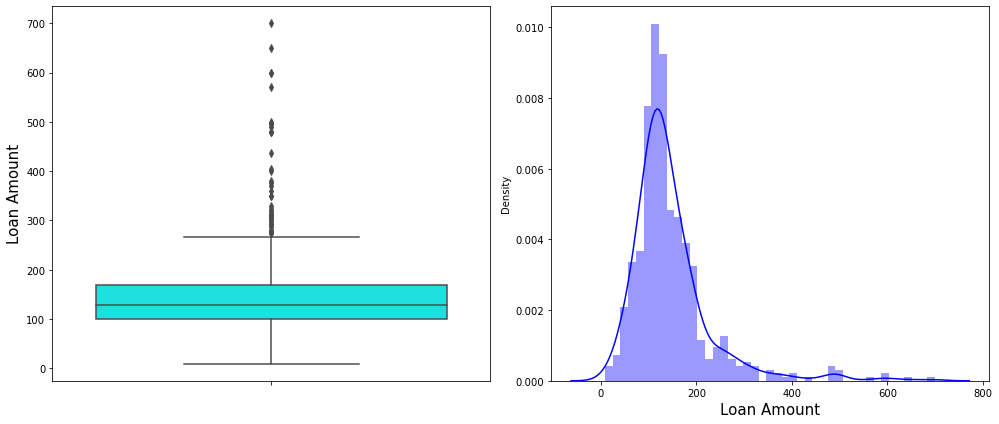

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


The mean is greater than median loan amount.
Clearly we can see outliers in boxplot and feature is strecth to far in distribution plot.
As extreme outliers are present in feature and for that reason as data is more sensitive to mean we are going to impute missing values in loan amount with median.


Imputation of Missing values
Imputation details :
Missing values in Loan amount is impute with median value.
Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with 360 Months.
Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

In [17]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [18]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


<AxesSubplot:>

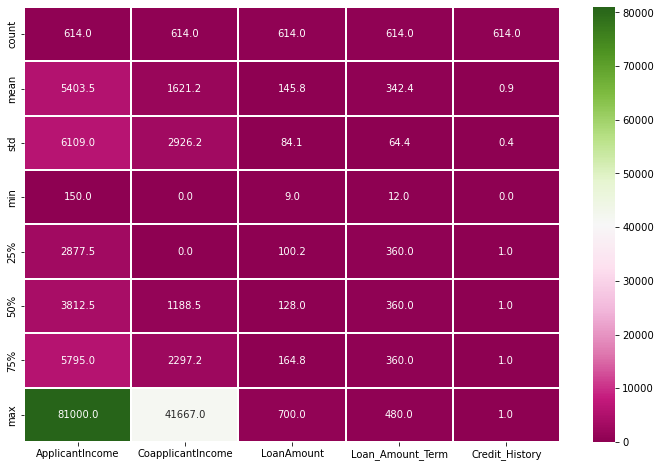

In [19]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed.

Taking 75% and Max rows into consideration we can surely say that Outliers exist in Applicant Income, Coapplicant Income,Loan Amount.

Since Credit History is Categorical variable there is no significance in different statstical parameter of it.

Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.

Minimum Applicant income is 150 and maximum is 81000.

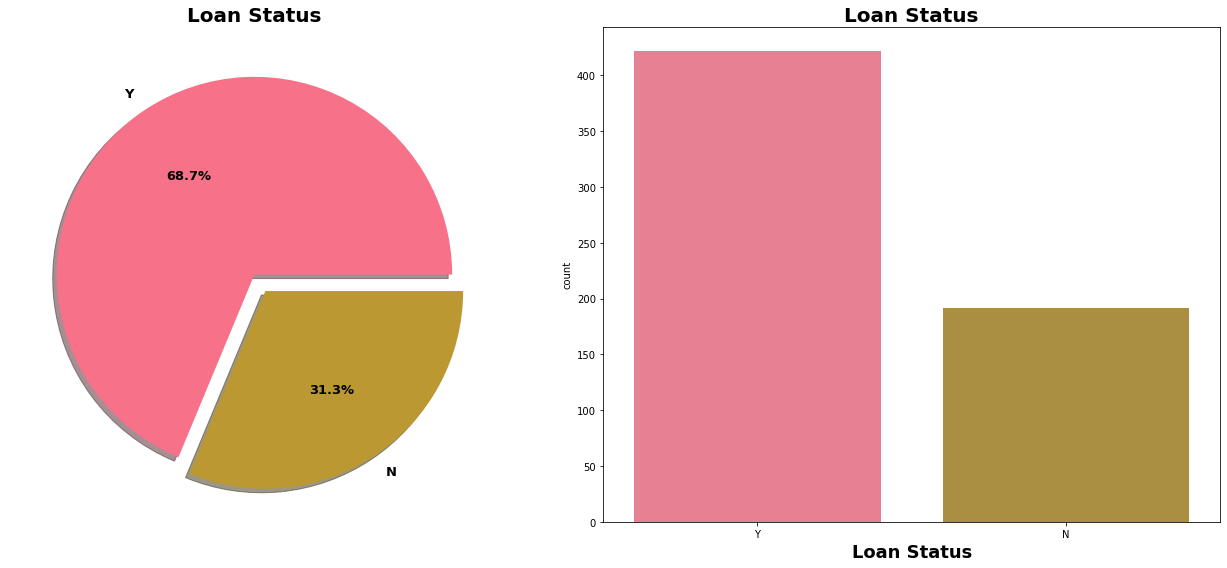

In [21]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()

68.7% Applicants gets loan Approval.
We can see that dataset is imbalanced in nature.

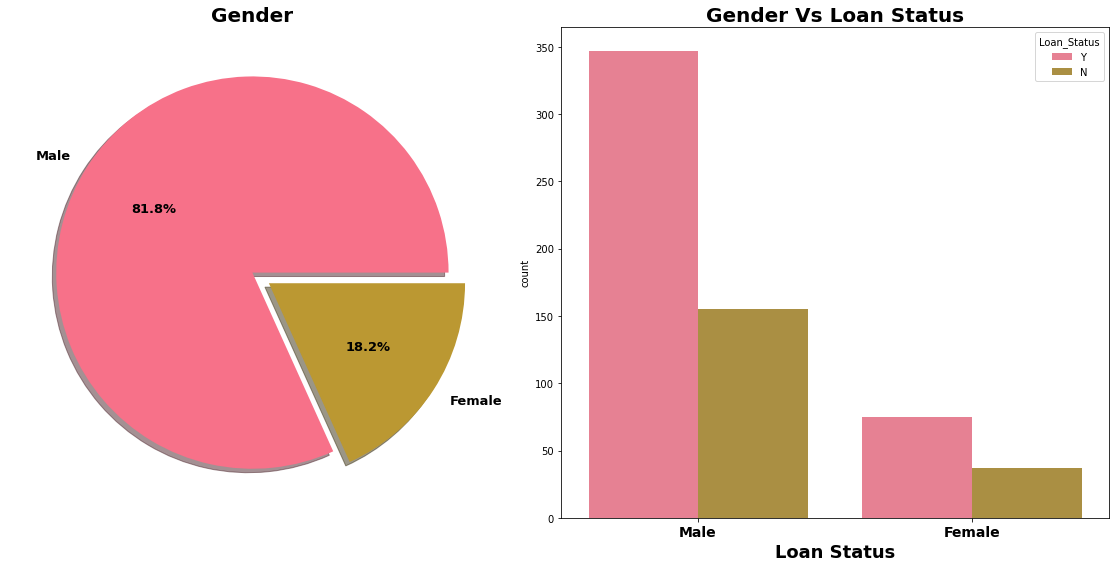

In [22]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [23]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


81.8% Applicant are male.

Irrespective Gender 65 % Applicant from each gender gets loan approval.It means that gender doesnot play any role loan approval.

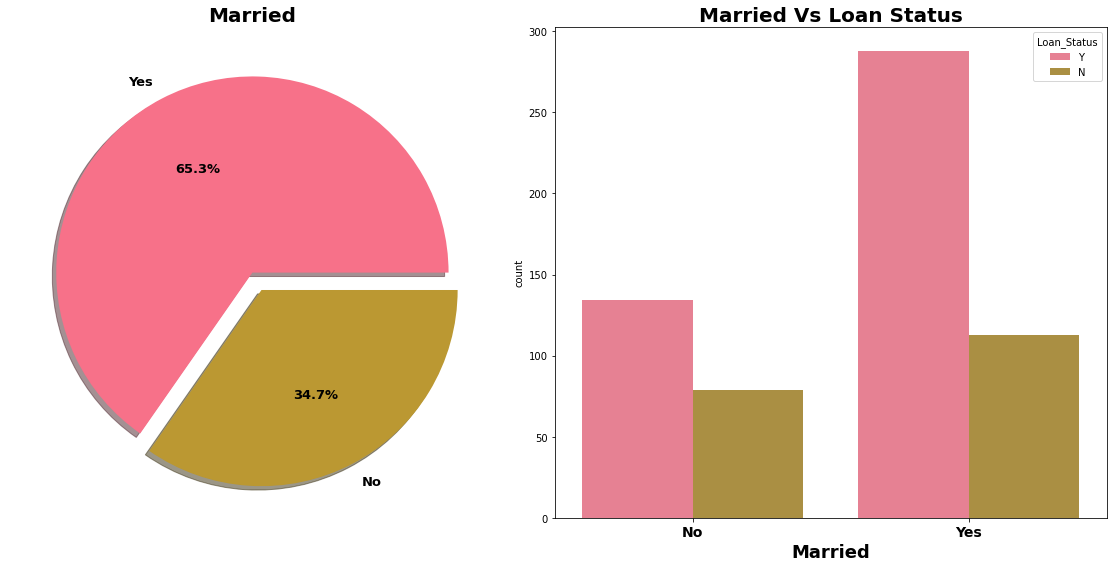

In [24]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [25]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')

5.3 % loan applicants are married. We can see from Count plot that Married people have more possibility of getting loan approval.

But Here comes Interesting observation from crosstab :
Unmarried Women are more chances of getting loan approval compare to married women.We will try to find which factor actually play deciding role here like education, employeement or Income.
Married Men are more chances of loan approval.

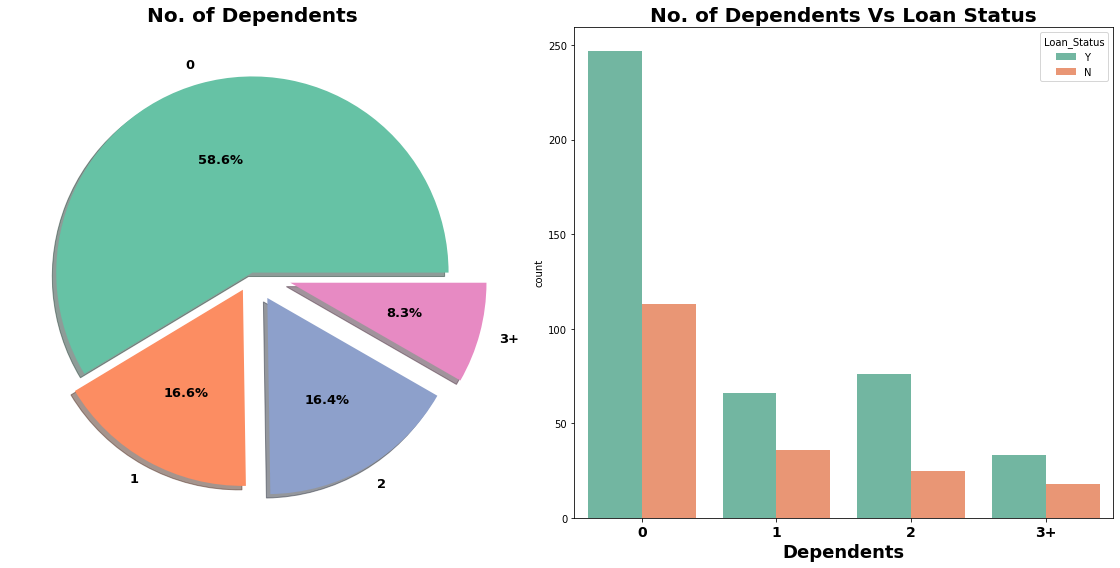

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [27]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [28]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

58.6% Applicants have no dependents on them.33% Applicants have either 1 or 2 dependents. It will interesting check whether with increase in number dependents their is increase in requirement loan amount.

Female having zero dependents have more chances to get loan approval compare to Females with dependents.

For male Maximum loan approval comes with 0 dependents followed by 2 dependents.

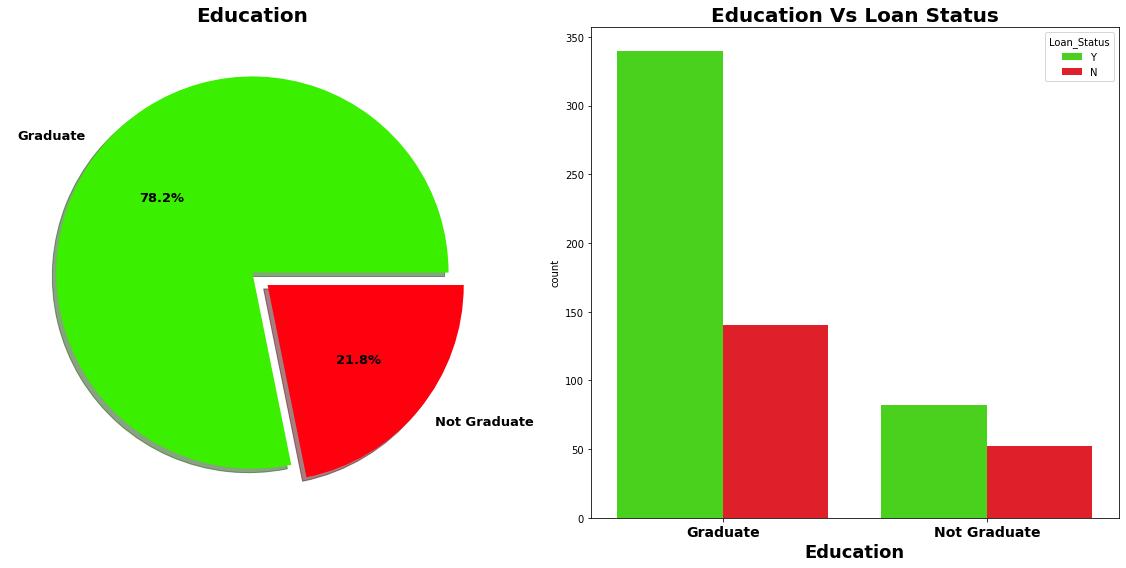

In [29]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [30]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [33]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [34]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

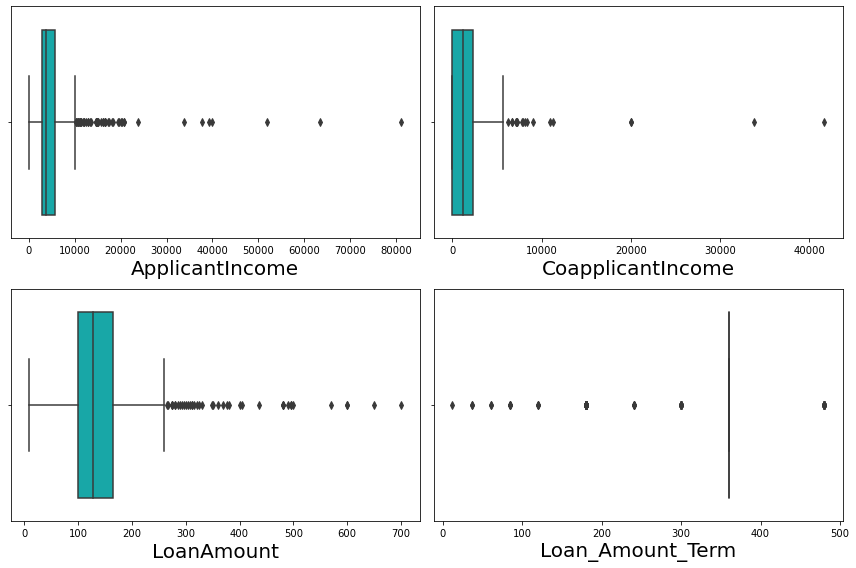

In [35]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [36]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [37]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [38]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


In [39]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


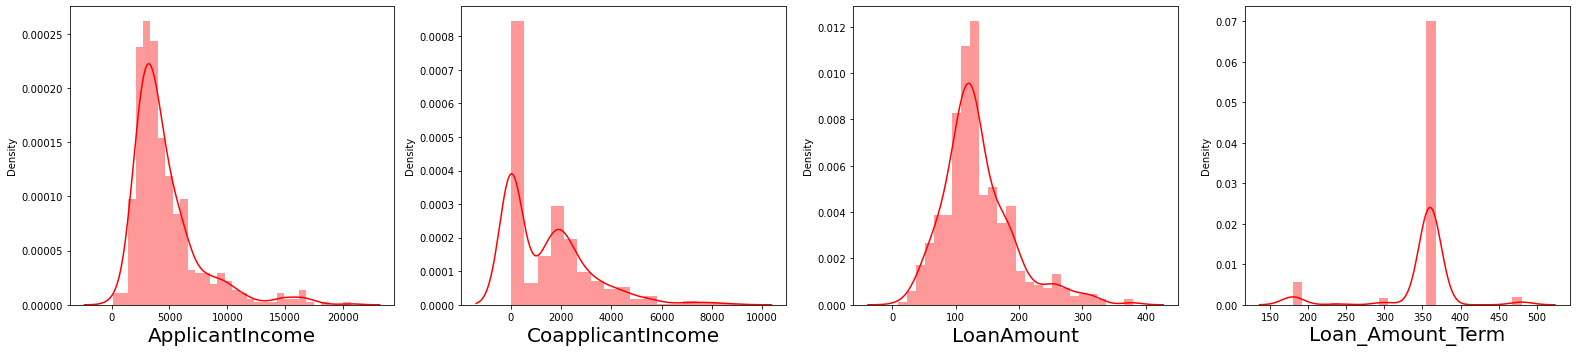

In [40]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [41]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.

Other features are categorical in nature so skewness is nothing to do with these remaining feature.We will ignore them.

We will yeo-johnson transformation method.

In [42]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [43]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [44]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

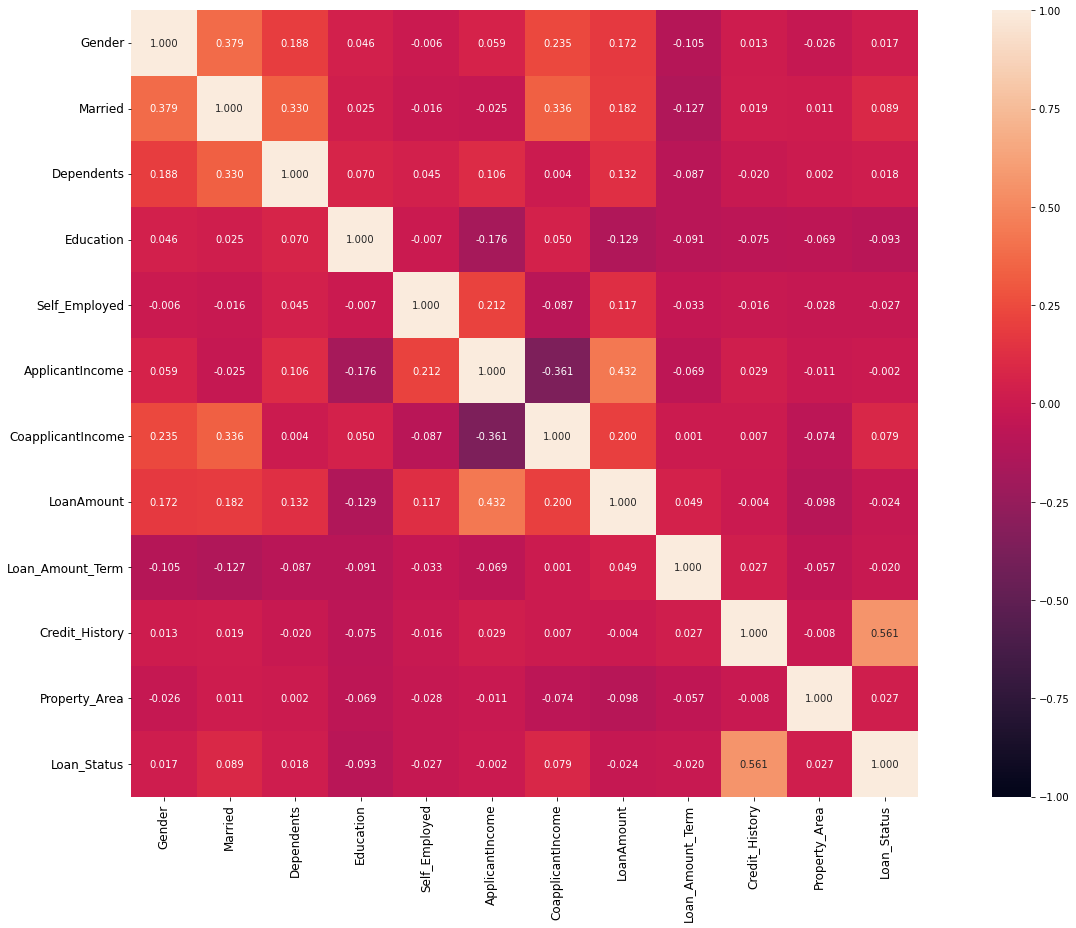

In [46]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

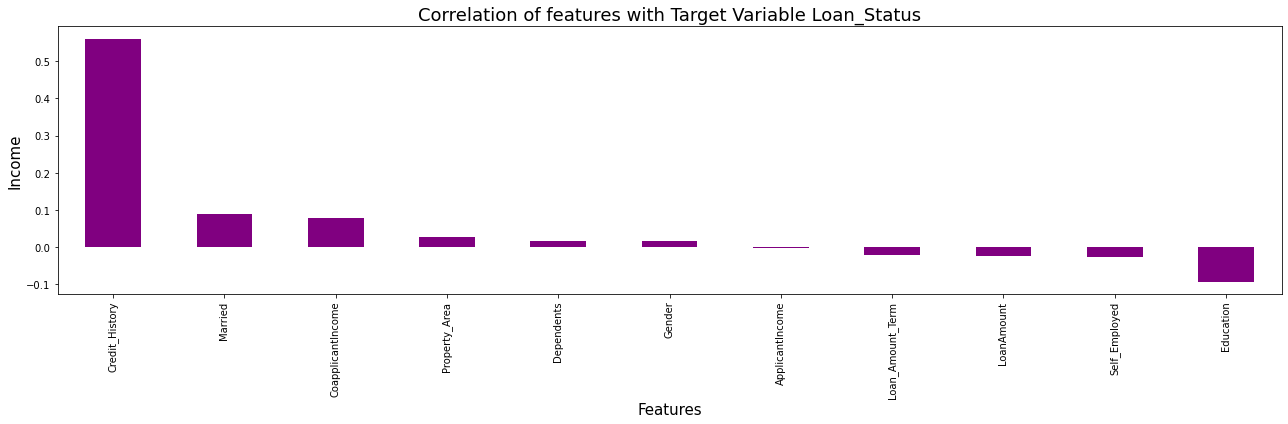

In [47]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif


,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


All features VIF is within permissible limit of 10.

So No Need to Worry About Multicollinearity.

In [49]:
df.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

As Target variable data is Imbalanced in nature we will need to balance target variable.

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [52]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [53]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8326359832635983 on Random_state 78


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8326359832635983


Confusion matrix of Logistics Regression : 
 [[ 79  31]
 [  9 120]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       110
           1       0.79      0.93      0.86       129

    accuracy                           0.83       239
   macro avg       0.85      0.82      0.83       239
weighted avg       0.84      0.83      0.83       239



In [59]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4619406036915484
RMSE value for k=  2 is: 0.513418276223035
RMSE value for k=  3 is: 0.4883581921595791
RMSE value for k=  4 is: 0.513418276223035
RMSE value for k=  5 is: 0.4753329597178616
RMSE value for k=  6 is: 0.49262341019056577
RMSE value for k=  7 is: 0.4753329597178616
RMSE value for k=  8 is: 0.47971400126799746
RMSE value for k=  9 is: 0.47971400126799746
RMSE value for k=  10 is: 0.49262341019056577
RMSE value for k=  11 is: 0.4883581921595791
RMSE value for k=  12 is: 0.4968520148758506
RMSE value for k=  13 is: 0.4883581921595791
RMSE value for k=  14 is: 0.4883581921595791
RMSE value for k=  15 is: 0.4840553929365547
RMSE value for k=  16 is: 0.49262341019056577
RMSE value for k=  17 is: 0.49262341019056577
RMSE value for k=  18 is: 0.5052030537546389
RMSE value for k=  19 is: 0.49262341019056577
RMSE value for k=  20 is: 0.4968520148758506
RMSE value for k=  21 is: 0.5093272287453544
RMSE value for k=  22 is: 0.50104493321917
RMSE value for k

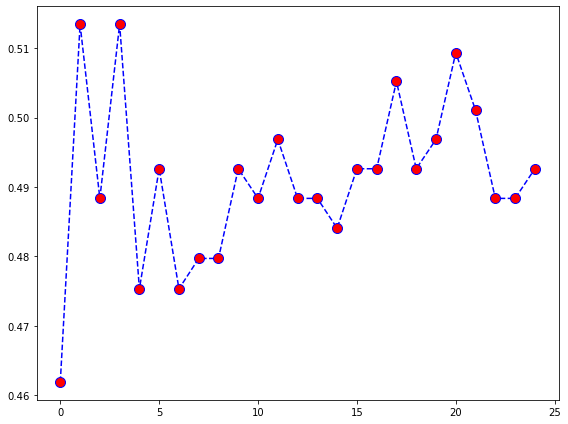

In [60]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='r', markersize=10)

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7740585774058577


Confusion matrix : 
 [[ 77  33]
 [ 21 108]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       110
           1       0.77      0.84      0.80       129

    accuracy                           0.77       239
   macro avg       0.78      0.77      0.77       239
weighted avg       0.78      0.77      0.77       239





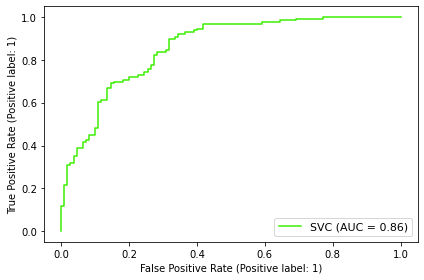

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7698744769874477


Confusion matrix : 
 [[ 69  41]
 [ 14 115]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.63      0.72       110
           1       0.74      0.89      0.81       129

    accuracy                           0.77       239
   macro avg       0.78      0.76      0.76       239
weighted avg       0.78      0.77      0.76       239





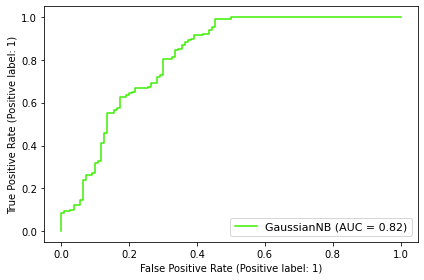

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.799163179916318


Confusion matrix : 
 [[ 91  19]
 [ 29 100]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       110
           1       0.84      0.78      0.81       129

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239





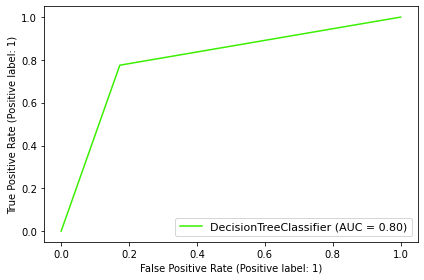

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7615062761506276


Confusion matrix : 
 [[86 24]
 [33 96]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75       110
           1       0.80      0.74      0.77       129

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239





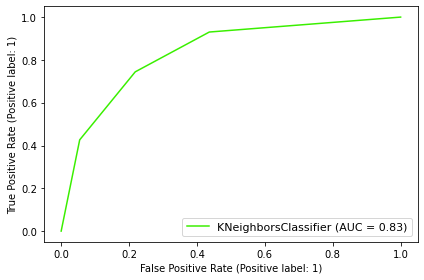

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8535564853556485


Confusion matrix : 
 [[ 89  21]
 [ 14 115]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.81      0.84       110
           1       0.85      0.89      0.87       129

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239





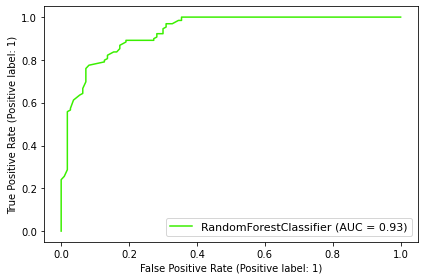

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8451882845188284


Confusion matrix : 
 [[ 89  21]
 [ 16 113]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       110
           1       0.84      0.88      0.86       129

    accuracy                           0.85       239
   macro avg       0.85      0.84      0.84       239
weighted avg       0.85      0.85      0.84       239





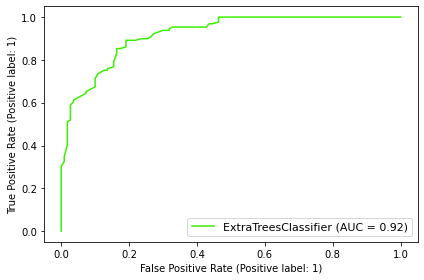

In [61]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')

In [62]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.66875    0.74213836 0.73584906 0.79245283 0.78616352]
Mean Score : 0.7450707547169813
Std deviation : 0.044389577216774244




Cross Validation Score SVC() :

Score : [0.71875    0.74213836 0.74213836 0.71069182 0.81132075]
Mean Score : 0.74500786163522
Std deviation : 0.03544272437841464




Cross Validation Score GaussianNB() :

Score : [0.6875     0.71698113 0.71698113 0.75471698 0.77987421]
Mean Score : 0.7312106918238992
Std deviation : 0.03236130199080518




Cross Validation Score DecisionTreeClassifier() :

Score : [0.65       0.68553459 0.77987421 0.74842767 0.78616352]
Mean Score : 0.73
Std deviation : 0.05358830118866445




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.7375     0.70440252 0.72955975 0.70440252 0.74842767]
Mean Score : 0.7248584905660377
Std deviation : 0.017744349851806483




Cross Validation Score RandomForestClassifier() :

Score : [0.78125    0.77987421 0.81132075 0.8

We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

In [63]:
from sklearn.model_selection import GridSearchCV

parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [64]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.679 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.741 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.775 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.721 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [65]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'auto',
 'n_estimators': 60}

In [66]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=60 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8451882845188284


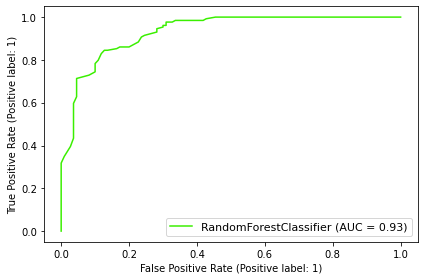

<Figure size 720x720 with 0 Axes>

Auc Score :
 0.8438689217758985


In [67]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [68]:
import joblib
joblib.dump(Final_mod,'Loan_Status.pkl')

['Loan_Status.pkl']